<a href="https://colab.research.google.com/github/dnesemgithb/CS4410/blob/main/Ex%2015.15%20Multiple_Linear_Regression_with_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ex 15.15: Multiple Linear Regression with Diabetes Dataset

In [30]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [31]:
diabetes.data.shape

(442, 10)

In [32]:
diabetes.target.shape

(442,)

In [33]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [34]:
import pandas as pd

In [35]:
pd.set_option('display.precision',4)

In [36]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [37]:
diabetes_df['DiseaseProgression'] = pd.Series(diabetes.target)

In [38]:
diabetes_df.sample(6)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
273,0.0744,0.0507,-0.0202,0.0460,0.0741,0.0328,-0.0360,0.0712,0.1064,0.0362,241.0
210,0.0090,-0.0446,0.0143,0.0150,0.0548,0.0472,0.0707,-0.0395,-0.0332,-0.0591,191.0
68,0.0381,0.0507,-0.0299,-0.0401,-0.0332,-0.0242,-0.0103,-0.0026,-0.0129,0.0031,160.0
410,-0.0091,0.0507,-0.0278,0.0081,0.0480,0.0372,-0.0287,0.0343,0.0661,-0.0425,209.0
371,0.0526,0.0507,-0.0094,0.0494,0.0507,-0.0192,-0.0139,0.0343,0.1193,-0.0176,197.0
290,0.0599,0.0507,0.0768,0.0253,0.0012,0.0168,-0.0544,0.0343,0.0299,0.0445,332.0


In [39]:
diabetes_df.describe().round(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


In [40]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0


In [42]:
import matplotlib.pyplot as plt

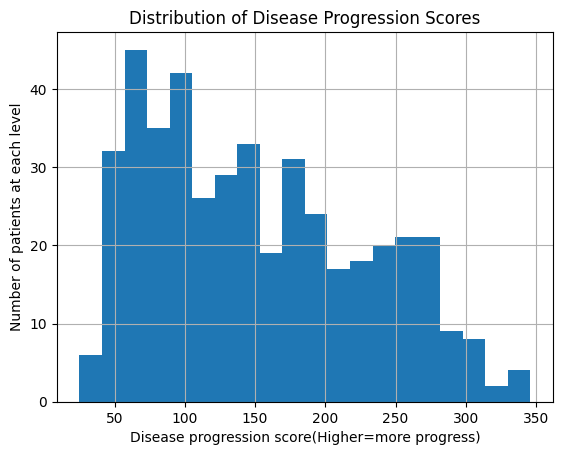

In [47]:
diabetes_df['DiseaseProgression'].hist(bins=20)
plt.title("Distribution of Disease Progression Scores")
plt.xlabel("Disease progression score(Higher=more progress)")
plt.ylabel("Number of patients at each level")
plt.grid(True, alpha=1)
plt.show()

In [48]:
import seaborn as sns


In [49]:
correlations = diabetes_df.corr()['DiseaseProgression'].sort_values(ascending=False)
print("Correlation with Disease Progression(Strongest->Weakest)")
print(correlations.round(3))

Correlation with Disease Progression(Strongest->Weakest)
DiseaseProgression    1.000
bmi                   0.586
s5                    0.566
bp                    0.441
s4                    0.430
s6                    0.382
s1                    0.212
age                   0.188
s2                    0.174
sex                   0.043
s3                   -0.395
Name: DiseaseProgression, dtype: float64


In [50]:
from sklearn.model_selection import train_test_split
x=diabetes.data
y=diabetes.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

print("Training set shape(features): ", x_train.shape)
print("Training st shape(target): ", y_train.shape)
print("Testing set shape(features): ", x_test.shape)
print("Testing set shape(target): ",y_test.shape)

Training set shape(features):  (353, 10)
Training st shape(target):  (353,)
Testing set shape(features):  (89, 10)
Testing set shape(target):  (89,)


In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print ("model trained!")

model trained!


In [54]:
print("Intercept:",model.intercept_.round(2))
print("\nFeature -> Coefficeient: ")
for feature, coef in zip(diabetes.feature_names, model.coef_):
  print(f"{feature:>6}: {coef:.3f}")

Intercept: 151.35

Feature -> Coefficeient: 
   age: 37.904
   sex: -241.964
   bmi: 542.429
    bp: 347.704
    s1: -931.489
    s2: 518.062
    s3: 163.420
    s4: 275.318
    s5: 736.199
    s6: 48.671


In [55]:
predicted = model.predict(x_test)
print("First 10 real progression scores (test set):")
print(y_test[:10].round(1))
print("First 10 predicted progression scores:")
print(predicted[:10].round(1))

First 10 real progression scores (test set):
[219.  70. 202. 230. 111.  84. 242. 272.  94.  96.]
First 10 predicted progression scores:
[139.5 179.5 134.  291.4 123.8  92.2 258.2 181.3  90.2 108.6]


In [57]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,predicted)

print(f"Mean squared Error (MSE): {mse:.1f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.1f} <- avg error size")
print(f"R^2 score: {r2:.3f} <- 1.0 = perfect, 0 = useless, neg = worse than guessing avg")

Mean squared Error (MSE): 2900.2
Root Mean Squared Error (RMSE): 53.9 <- avg error size
R^2 score: 0.453 <- 1.0 = perfect, 0 = useless, neg = worse than guessing avg


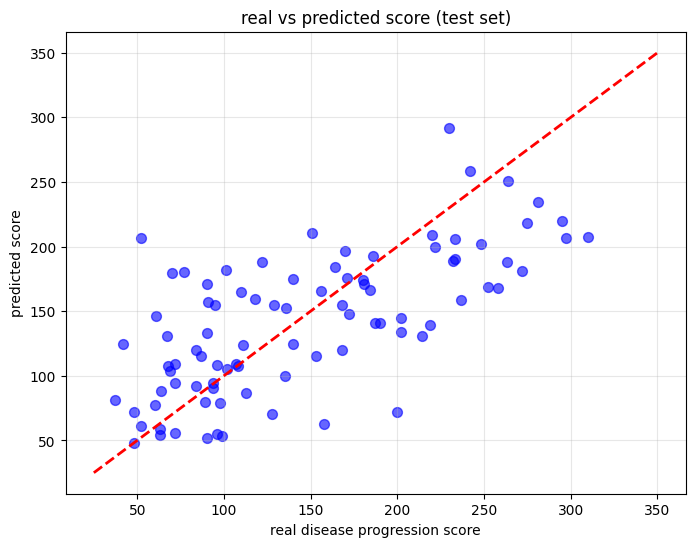

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predicted, alpha=0.6, color = 'blue', s=50)
plt.plot([25,350],[25,350],color='red',linestyle='--',linewidth=2)
plt.xlabel("real disease progression score")
plt.ylabel("predicted score")
plt.title("real vs predicted score (test set)")
plt.grid(True,alpha=0.3)
plt.show()


In [59]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score

estimators = {
    'LinearRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

for name, est in estimators.items():
  kfold = KFold(n_splits=10, shuffle=True, random_state=42)
  scores = cross_val_score(est, diabetes.data, diabetes.target, cv=kfold,scoring='r2')
  print(f"{name:>16}: average R^2 = {scores.mean():.3f} +- {scores.std():.3f}")

LinearRegression: average R^2 = 0.465 +- 0.114
      ElasticNet: average R^2 = -0.021 +- 0.033
           Lasso: average R^2 = 0.325 +- 0.070
           Ridge: average R^2 = 0.409 +- 0.085


Linear Regression was the best performer by a slight margine over ridge with lasso coming in next and elasticnet being worse than guessing.